In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

## 🔹 [One-Way ANOVA 실전 문제]

### 📝 문제:

한 교육기관에서는 **세 가지 학습 방법(A, B, C)**이  
학생들의 **시험 성적에 차이를 주는지** 알아보고자 한다.

각 그룹에서 무작위로 6명의 점수를 추출했으며, 결과는 다음과 같다:

| 학습법 | 점수 |
|--------|------|
| A      | 85, 88, 90, 86, 87, 89 |
| B      | 78, 75, 80, 76, 77, 79 |
| C      | 92, 95, 91, 94, 93, 96 |

In [3]:
A = [85, 88, 90, 86, 87, 89]
B = [78, 75, 80, 76, 77, 79]
C = [92, 95, 91, 94, 93, 96]

data = {
    'score': A + B + C,
    'group': ['A'] * 6 + ['B'] * 6 + ['C'] * 6
}

df = pd.DataFrame(data)

H0 = 'A,B,C간 차이가 없다.'
H1 = 'A,B,C간 차이가 있다.'

In [5]:
# 정규성 검정
group_a = df[df['group'] == 'A']
group_b = df[df['group'] == 'B']
group_c = df[df['group'] == 'C']

statistic_a, p_value_a = stats.shapiro(group_a['score'])
statistic_b, p_value_b = stats.shapiro(group_b['score'])
statistic_c, p_value_c = stats.shapiro(group_c['score'])

if p_value_a > 0.05 and p_value_b > 0.05 and p_value_c > 0.05:
    print('정규성을 만족합니다.')
else:
    print('정규성을 만족하지 않습니다.')

정규성을 만족합니다.


In [ ]:
# 등분산성 검정
statistic, p_value = stats.levene(group_a['score'], group_b['score'], group_c['score'])
if p_value > 0.05:
    print('등분산성을 만족합니다.')
else:
    print('등분산성을 만족하지 않습니다.')    

등분산성을 만족합니다.


In [10]:
model = ols('score ~ group', data=df).fit()
anova_table = anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
group,784.0,2.0,112.0,9.609487e-10
Residual,52.5,15.0,NaN,NaN


In [21]:
if anova_table.loc['group', 'PR(>F)'] < 0.05:
    print(H1)
else:
    print(H0)

A,B,C간 차이가 있다.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B    -10.0    0.0 -12.8056 -7.1944   True
     A      C      6.0 0.0002   3.1944  8.8056   True
     B      C     16.0    0.0  13.1944 18.8056   True
-----------------------------------------------------


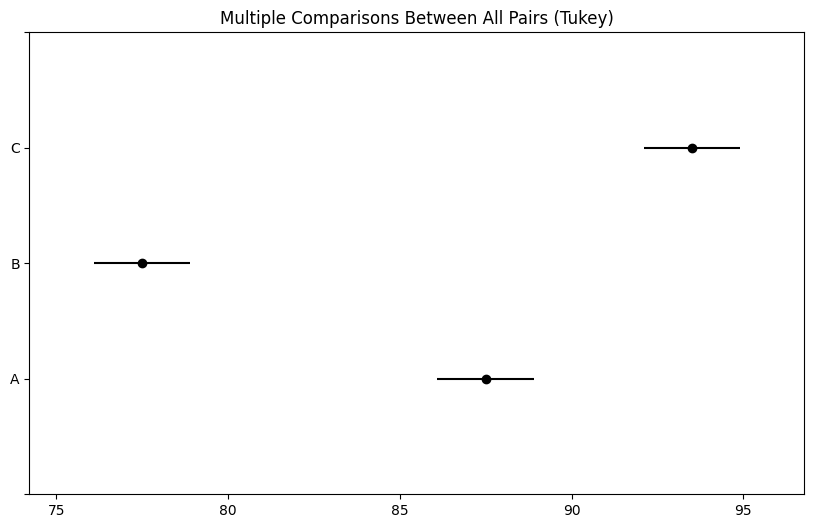

In [22]:
# 사후검정

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)
print(tukey.summary())
fig = tukey.plot_simultaneous()